Pisanje Laplasovog algoritma za detekciju ivica

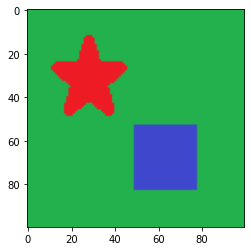

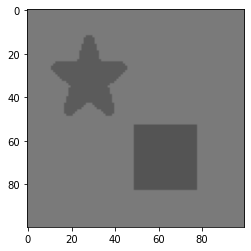

---Grayscale 0.15861153602600098 seconds ---


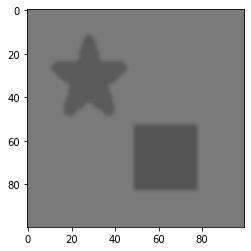

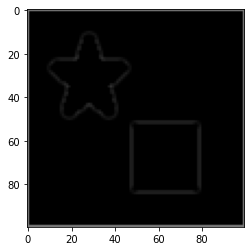

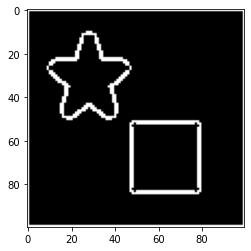

---Detekcija ivica 1.074113130569458 seconds ---
---Kodovanje 0.13863158226013184 seconds ---


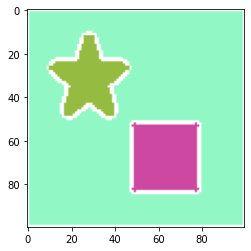

---Bojenje 0.21941876411437988 seconds ---


In [16]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import random
import time

#Ucitavanje slike
picture = Image.open('slike/slika1.bmp')
plt.imshow(picture)
plt.show()

start_time = time.time()
#Grayscale
width, height = picture.size
for x in range(width):
    for y in range(height):
        current_color = picture.getpixel( (x,y) )
        grey = int(0.299*current_color[0] + 0.587*current_color[1] + 0.114*current_color[2])
        new_color = (grey, grey, grey)
        picture.putpixel( (x,y), new_color)
plt.imshow(picture)
plt.show()
print("---Grayscale %s seconds ---" % (time.time() - start_time))
start_time = time.time()
#Gaussian blur
gaussian_pictrue = picture.copy()
for x in range(1, width-1):
    for y in range(1, height-1):
        new_pixel_gaussian = int(0.25*picture.getpixel((x,y))[0] + 0.0625*(picture.getpixel((x-1,y-1))[0] + picture.getpixel((x-1,y+1))[0] + picture.getpixel((x+1,y-1))[0] + picture.getpixel((x+1,y+1))[0]) + 0.125*(picture.getpixel((x,y-1))[0] + picture.getpixel((x,y+1))[0] + picture.getpixel((x-1,y))[0] + picture.getpixel((x+1,y))[0]))
        new_pixel = (new_pixel_gaussian, new_pixel_gaussian, new_pixel_gaussian)
        gaussian_pictrue.putpixel((x,y), new_pixel)
plt.imshow(gaussian_pictrue)
plt.show()

#Laplasov algoritam
laplacian_picture = gaussian_pictrue.copy()
for x in range(1, width-1):
    for y in range(1, height-1):
        new_pixel_laplacian = int(8*gaussian_pictrue.getpixel((x,y))[0] - (gaussian_pictrue.getpixel((x-1,y-1))[0] + gaussian_pictrue.getpixel((x-1,y+1))[0] + gaussian_pictrue.getpixel((x+1,y-1))[0] + gaussian_pictrue.getpixel((x+1,y+1))[0] + gaussian_pictrue.getpixel((x,y-1))[0] + gaussian_pictrue.getpixel((x,y+1))[0] + gaussian_pictrue.getpixel((x-1,y))[0] + gaussian_pictrue.getpixel((x+1,y))[0]))
        new_pixel = (new_pixel_laplacian, new_pixel_laplacian, new_pixel_laplacian)
        laplacian_picture.putpixel((x,y), new_pixel)
plt.imshow(laplacian_picture)
plt.show()

edge_picture = laplacian_picture.copy()
for x in range(width):
    for y in range(height):
        current_pixel = laplacian_picture.getpixel((x,y))
        new_pixel = (0,0,0,255)
        if (current_pixel != (0,0,0, 255) and current_pixel > (10,10,10, 255)):
            new_pixel = (255,255,255,255)
        edge_picture.putpixel((x,y), new_pixel)
plt.imshow(edge_picture)
plt.show()
print("---Detekcija ivica %s seconds ---" % (time.time() - start_time))
start_time = time.time()
paints = []
i = 0
code = 1
change = 0
painted_picture = edge_picture.copy()

def findBlackSpots(painted_picture, w, h):
    for x in range(1, w-1):
        for y in range(1, h-1):
            current_pixel = painted_picture.getpixel((x,y))
            if current_pixel == (0,0,0) or current_pixel == (0,0,0,255):
                return x, y
    return -1, -1
def paintWhiteSpots(painted_picture, w, h):
    for x in range(1, w-1):
        for y in range(1, h-1):
            current_pixel = painted_picture.getpixel((x,y))
            if current_pixel == (255,255,255) or current_pixel == (255,255,255,255):
                painted_picture.putpixel((x,y), (0,0,0,255))
def dfs(painted_picture, xx, yy, w, h, code):
    stack = [(xx, yy)]
    while stack:
        x, y = stack.pop()
        if x < 1 or y < 1 or x > w-1 or y > h-1:
            continue
        current_pixel = painted_picture.getpixel((x,y))
        if current_pixel == (0,0,0) or current_pixel == (0,0,0,255):
            painted_picture.putpixel((x,y), code)
            stack.append((x+1, y))
            stack.append((x-1, y))
            stack.append((x, y+1))
            stack.append((x, y-1))

def randomColor():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return (red, green, blue, 255)
            
while True:
    xx, yy = findBlackSpots(painted_picture, width, height)
    if xx == -1 and yy == -1:
        break
    dfs(painted_picture, xx, yy, width, height, code)
    code += 1;
    
print("---Kodovanje %s seconds ---" % (time.time() - start_time))
start_time = time.time()
    
for i in range(code):
    paints.append(randomColor())

for x in range(width):
    for y in range(height):
        current_color = painted_picture.getpixel((x,y))
        if(int(current_color[0]) < code):
            paint = paints[int(current_color[0])]
            new_color = (paint[0], paint[1], paint[2])
            painted_picture.putpixel( (x,y), new_color)
        
plt.imshow(painted_picture)
plt.show()
print("---Bojenje %s seconds ---" % (time.time() - start_time))